The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv`.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [10]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!
nobel = pd.read_csv('nobel.csv')
print(nobel.head())

   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  laureate_type                     full_name  birth_date         birth_city  \
0    I

# Find the most common gender and birth country

In [11]:
top_gender = nobel['sex'].mode()[0]
top_country = nobel['birth_country'].mode()[0]

print("Top gender is {}, while top country is {}".format(top_gender, top_country))

Top gender is Male, while top country is United States of America


# Calculate the proportion of US-born winners per decade

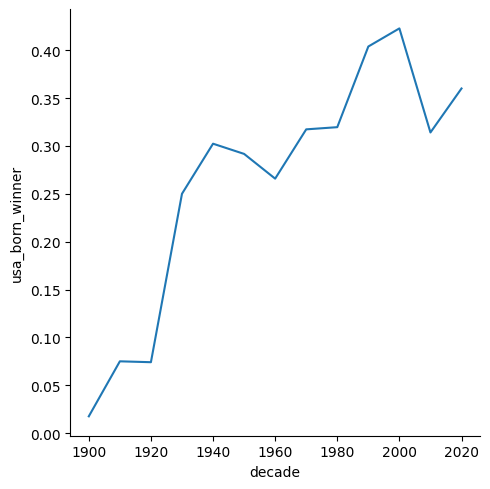

In [28]:
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

ax1 = sns.relplot(kind='line', x='decade', y='usa_born_winner', data=prop_usa_winners)

# Calculate and plot the proportion of female laureates by decade and category

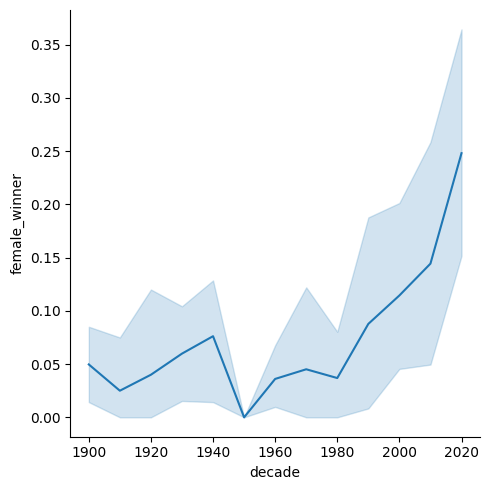

In [47]:
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

ax2 = sns.relplot(kind='line', x='decade', y='female_winner', data=prop_female_winners)

# Find first woman to win a Nobel Prize

In [51]:
female_winners = nobel[nobel['sex'] == 'Female']
first_woman_name = female_winners['full_name'].iloc[0]
first_woman_category = female_winners['category'].iloc[0]

In [52]:
print(first_woman_name)

Marie Curie, née Sklodowska


In [53]:
print(first_woman_category)

Physics


# Determine repeat winners

In [57]:
count_name = nobel['full_name'].value_counts()
count_name

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
                                                                                    ..
Karl Ziegler                                                                         1
Giulio Natta                                                                         1
Giorgos Seferis                                                                      1
Sir John Carew Eccles                                                                1
Claudia Goldin                                                                       1
Name: count, Length: 993, dtype: 

In [65]:
repeat_list = list(count_name[count_name > 1].index)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']